# Data Analysis in Walmart Stores
The American company Walmart is considering hiring the services of your Data Analytics consulting firm to help them make better informed decisions and develop data-driven strategies.

Before making the decision, they want to be sure that work like this can add real value by leading to clear recommendations and learning. To that end, they send you a sample of their database, and ask you to prepare a project presentation showing the type of analysis that could be performed.

The sample submitted by the customer contains weekly sales data for 45 different stores in the chain over a 2-year period. For purposes of this project, your supervisors ask you to work only with data from the last 2 months available.

# Introduction
Walmart is a multinational corporation of American origin, with more than 11,000 stores distributed in 28 countries and approximately 2.2 million employees.

The present work seeks to answer the question of how data analysis could improve the company's sales.

The work is divided into 3:
1. Study and context of the database
2. Graphic exploration and analysis
3. Conclusions and recommendations

# 1. Data Cleaning and Filtering
Lets first understand our datasets, and work through them until we obtain our ready-to-work version of data about sales in different stores in the last 2 months.

In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np
from scipy import stats

## stores.csv

In [2]:
stores = pd.read_csv('stores.csv')
print('stores: number of rows and columns: ', stores.shape)
print('store types:', stores['Type'].unique())
print('min size:', stores['Size'].min(), 'max size:', stores['Size'].max())
print(stores.dtypes)
stores.head()

stores: number of rows and columns:  (45, 3)
store types: ['A' 'B' 'C']
min size: 34875 max size: 219622
Store     int64
Type     object
Size      int64
dtype: object


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


## train.csv

In [3]:
train = pd.read_csv('train.csv')
print('train: number of rows and columns: ', train.shape)
print('department numbers:', len(train['Dept'].unique()))
print('max dept. number:', train['Dept'].max(), '// min dept. number:', train['Dept'].min())
print('min sales:', train['Weekly_Sales'].min(), '// max sales:', train['Weekly_Sales'].max())
print(train.dtypes)
train.head(-5)

train: number of rows and columns:  (421570, 5)
department numbers: 81
max dept. number: 99 // min dept. number: 1
min sales: -4988.94 // max sales: 693099.36
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421560,45,98,2012-08-24,415.40,False
421561,45,98,2012-08-31,346.04,False
421562,45,98,2012-09-07,352.44,True
421563,45,98,2012-09-14,605.96,False


## test.csv

In [4]:
test = pd.read_csv('test.csv')
print('test: number of rows and columns: ', test.shape)
print('department numbers:', len(test['Dept'].unique()))
print('max dept. number:', test['Dept'].max(), '// min dept. number:', test['Dept'].min())
print(test.dtypes)
test.head(-5)

test: number of rows and columns:  (115064, 4)
department numbers: 81
max dept. number: 99 // min dept. number: 1
Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115054,45,98,2013-05-24,False
115055,45,98,2013-05-31,False
115056,45,98,2013-06-07,False
115057,45,98,2013-06-14,False


## features.csv

In [5]:
features = pd.read_csv('features.csv')
print('features: number of rows and columns: ', features.shape)
print('min temp °F:', features['Temperature'].min(), '// max temp °F:', features['Temperature'].max())
print('min Fuel Price:', features['Fuel_Price'].min(), '// max Fuel Price:', features['Fuel_Price'].max())
#print('min Markdown among all 5 types:', features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].min())
#print('max Markdown among all 5 types:', features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].max())
print('min CPI:', features['CPI'].min(), '// max CPI:', features['CPI'].max())
print('min Unemployment rate:', features['Unemployment'].min(), 'max Unemployment rate:', features['Unemployment'].max())
print(features.dtypes)
features.head(-5)

features: number of rows and columns:  (8190, 12)
min temp °F: -7.29 // max temp °F: 101.95
min Fuel Price: 2.472 // max Fuel Price: 4.468
min CPI: 126.064 // max CPI: 228.9764563
min Unemployment rate: 3.684 max Unemployment rate: 14.313
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8180,45,2013-05-24,67.11,3.627,3249.34,481.82,58.48,1183.23,1309.30,NaN,NaN,False
8181,45,2013-05-31,65.88,3.646,6474.49,411.38,77.06,9.38,4227.27,NaN,NaN,False
8182,45,2013-06-07,70.71,3.633,9977.82,744.29,80.00,4825.71,3597.34,NaN,NaN,False
8183,45,2013-06-14,70.01,3.632,2471.44,517.87,348.54,2612.33,3459.39,NaN,NaN,False


## Merging, slicing and filtering
- Merge tables stores, features and train
- Slice to only work with data from last 2 months (September-October 2012)
- Filter Weekly Sales values < 0

In [6]:
# To begin our work we need to merge stores, features and train datasets.

# First merge features and Store:
features_store = features.merge(stores, how='inner', on = "Store")

# Now merge train to the table just created:
data = train.merge(features_store, how='inner', on=['Store','Date','IsHoliday'])

# Slice to access to last 2 months only
# First convert the 'object' type column to 'datetype'
data['Date'] = pd.to_datetime(data['Date'])

# Get data from september and october 2010:
data = data[data['Date'] >= '2012-09-01 00:00:00']

# Remove weekly sales <$0 (no sense in this values)
data.Weekly_Sales.isna().sum() # Check we dont have NaN vallues
data = data[data['Weekly_Sales'] >= 0]
data.shape

(23664, 16)

## Final dataset: 'data'

In [7]:
# Inspect our final filtered dataframe:
print('Number of rows and columns:', data.shape)
print('Number of different departments:', len(data.Dept.unique()))
print('Date range between:', data.Date.min(), 'and', data.Date.max())
print('Weekly sales values ranging between:', data.Weekly_Sales.min(), 'and', data.Weekly_Sales.max())
print('Temperatures between: [F]', data.Temperature.min(), 'and', data.Temperature.max())
print('Fuel cost per region between: [$/gal]', data.Fuel_Price.min(), 'and', data.Fuel_Price.max())
print('CPI ranging between [$]:', data.CPI.min(), 'and', data.CPI.max())
print('Unemployment rates between (%):', data.Unemployment.min(), 'and', data.Unemployment.max())
print('Store size between:', data.Size.min(), 'and', data.Size.max())
print('Store types:', data.Type.unique())
print(data.dtypes)
data.head(-5)

Number of rows and columns: (23664, 16)
Number of different departments: 80
Date range between: 2012-09-07 00:00:00 and 2012-10-26 00:00:00
Weekly sales values ranging between: 0.0 and 192860.85
Temperatures between: [F] 39.38 and 92.02
Fuel cost per region between: [$/gal] 3.494 and 4.468
CPI ranging between [$]: 130.9325484 and 227.2328068
Unemployment rates between (%): 3.879 and 10.926
Store size between: 34875 and 219622
Store types: ['A' 'B' 'C']
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
9667,1,1,2012-09-07,18322.37,True,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,222.439015,6.908,A,151315
9668,1,2,2012-09-07,47344.50,True,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,222.439015,6.908,A,151315
9669,1,3,2012-09-07,18368.51,True,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,222.439015,6.908,A,151315
9670,1,4,2012-09-07,39549.27,True,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,222.439015,6.908,A,151315
9671,1,5,2012-09-07,18236.15,True,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,222.439015,6.908,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421560,45,85,2012-10-26,1689.10,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
421561,45,87,2012-10-26,8187.66,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
421562,45,90,2012-10-26,25352.32,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
421563,45,91,2012-10-26,16330.84,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


# 2. Exploratory Data Analysis (EDA)
Now that our data is clean and filtered based on our requirements, we will begin our EDA to visualize the relationship between the variables in our dataset.

## Sales vs Store Size
It is clear that larger store sizes will result in higher sales, so it is expected to be the variable that most affects them, along with the type of department.

Let's quantify this relationship of sales vs size:

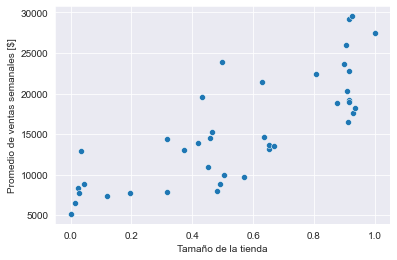

In [8]:
mean_sales_by_Size = data.groupby('Size')['Weekly_Sales'].mean()
mean_sales_by_Size = pd.DataFrame(mean_sales_by_Size)
mean_sales_by_Size.reset_index(inplace=True)

#Normalize (0-1) our Size column because we dont know the units:
mean_sales_by_Size['Size'] = (mean_sales_by_Size['Size']-mean_sales_by_Size['Size'].min()) \
/ (mean_sales_by_Size['Size'].max() - mean_sales_by_Size['Size'].min())

#Plot
sns.set_style('darkgrid')
sns.scatterplot(x='Size', y='Weekly_Sales', data=mean_sales_by_Size)
plt.xlabel('Tamaño de la tienda')
plt.ylabel('Promedio de ventas semanales [$]')
plt.show()

We can see an (expected) positive correlation between store size and its average weekly sales over the 2-month period. Let's quantify this correlation and build a linear model:

pearson R: 0.7897689493710539
R2: 0.6237349933906583


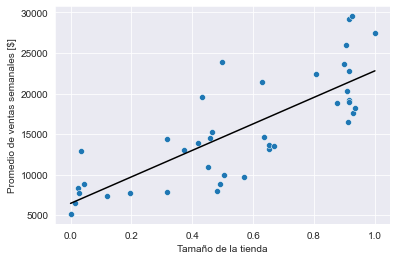

In [9]:
# Build the linear model
slope, intercept = np.polyfit(mean_sales_by_Size['Size'], mean_sales_by_Size['Weekly_Sales'], 1)
correlation_matrix = np.corrcoef(mean_sales_by_Size['Size'], mean_sales_by_Size['Weekly_Sales'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print('pearson R:', correlation_xy)
print('R2:', r_squared)

#Plot regression line
sns.set_style('darkgrid')
sns.scatterplot(x='Size', y='Weekly_Sales', data=mean_sales_by_Size)
plt.plot(mean_sales_by_Size['Size'], slope*mean_sales_by_Size['Size'] + intercept, color='black')
plt.xlabel('Tamaño de la tienda')
plt.ylabel('Promedio de ventas semanales [$]')
plt.show()

## Total Sales per Store Type

Type
A    234827507.0
B    106788342.0
C     23394936.0
Name: Weekly_Sales, dtype: float64


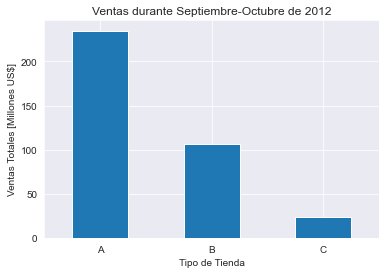

In [10]:
type_store_sales = data.groupby('Type')['Weekly_Sales'].sum()
print(type_store_sales.round(0))
(type_store_sales/1000000).round(2).plot(kind='bar')
plt.title('Ventas durante Septiembre-Octubre de 2012')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Ventas Totales [Millones US$]')
plt.xticks(rotation=0)
plt.show()

## Average weekly sale per store type in holidays
Let's look at the average weekly sales across all stores on and off holidays:

   IsHoliday  Weekly_Sales
0      False     45.240048
1       True     48.330449


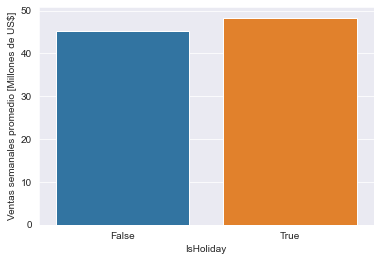

In [11]:
# General Avg. Weekly Sale whether is Holiday or not
mean_weekly_sales = (data.groupby(['Date','IsHoliday'])['Weekly_Sales'].sum()).groupby(['IsHoliday']).mean()
mean_weekly_sales = pd.DataFrame(mean_weekly_sales.round(0))
mean_weekly_sales.reset_index(inplace=True)
mean_weekly_sales['Weekly_Sales'] = mean_weekly_sales['Weekly_Sales'] / 1000000
print(mean_weekly_sales)
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=mean_weekly_sales)
plt.ylabel('Ventas semanales promedio [Millones de US$]')
plt.show()

There is a small, but clear difference between holidays and non-holidays. Let's see if it depends on the type of store:

  Type  IsHoliday  Weekly_Sales
0    A      False     29.092527
1    A       True     31.179820
2    B      False     13.244050
3    B       True     14.079993
4    C      False      2.903471
5    C       True      3.070636


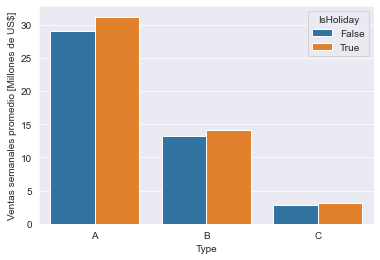

In [12]:
mean_weekly_sales_type = (data.groupby(['Type','Date','IsHoliday'])['Weekly_Sales'].sum()).groupby(['Type', 'IsHoliday']).mean()
mean_weekly_sales_type = pd.DataFrame(mean_weekly_sales_type.round(0))
mean_weekly_sales_type.reset_index(inplace=True)
mean_weekly_sales_type['Weekly_Sales'] = mean_weekly_sales_type['Weekly_Sales'] / 1000000
print(mean_weekly_sales_type)
sns.barplot(x='Type', y='Weekly_Sales', hue='IsHoliday', data=mean_weekly_sales_type)
plt.ylabel('Ventas semanales promedio [Millones de US$]')
plt.show()

The % difference is similar for the 3 types of stores (5-7%). It would be interesting to see this difference for more important holidays such as Christmas, since in the range of this date (September-October) there are no such important holidays in the United States.

## Sales vs Temperature in the Stores' region
Are sales affected by extreme temperature conditions? (too cold or too hot)

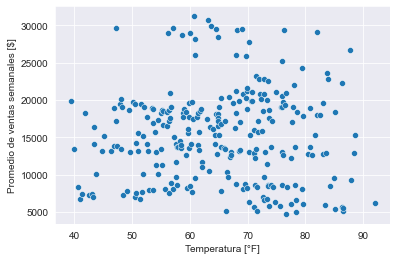

In [13]:
mean_sales_by_temp = data.groupby('Temperature')['Weekly_Sales'].mean()
mean_sales_by_temp = pd.DataFrame(mean_sales_by_temp)
mean_sales_by_temp.reset_index(inplace=True)
mean_sales_by_temp
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=mean_sales_by_temp)
plt.xlabel('Temperatura [°F]')
plt.ylabel('Promedio de ventas semanales [$]')
plt.show()

We can notice that the highest average weekly sales are between more "friendly" temperatures. Perhaps buyers prefer to stay indoors for very cold or very hot climates, and buy through online services

## Sales vs CPI
Are sales higher in regions with higher CPI? (higher CPI: more purchasing power).

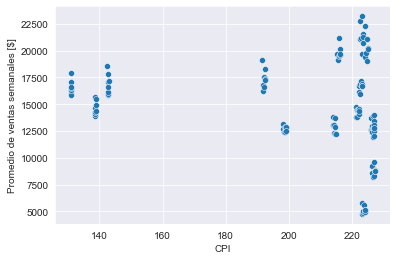

pearson R: -0.1765859869199958


In [14]:
# Prepare de data
mean_sales_by_CPI = data.groupby('CPI')['Weekly_Sales'].mean()
mean_sales_by_CPI = pd.DataFrame(mean_sales_by_CPI)
mean_sales_by_CPI.reset_index(inplace=True)

# Plot
sns.scatterplot(x='CPI', y='Weekly_Sales', data=mean_sales_by_CPI)
plt.ylabel('Promedio de ventas semanales [$]')
plt.show()

# Pearson R
correlation_matrix_CPI = np.corrcoef(mean_sales_by_CPI['CPI'], mean_sales_by_CPI['Weekly_Sales'])
correlation_xy_CPI = correlation_matrix_CPI[0,1]
print('pearson R:', correlation_xy_CPI)

We cannot affirm what was previously questioned, however, two clear regions (left and right) can be seen according to purchasing power. It would be interesting to analyze why there is so much difference between the departmental sales of the group on the right: Perhaps some types of products are not of such interest in these regions?

## Sales vs Unemployment Rate

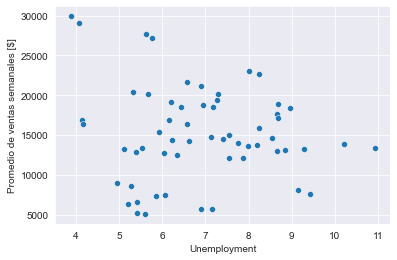

pearson R: -0.11893259833161701


In [15]:
# Prepare de data
mean_sales_by_Unemployment = data.groupby('Unemployment')['Weekly_Sales'].mean()
mean_sales_by_Unemployment = pd.DataFrame(mean_sales_by_Unemployment)
mean_sales_by_Unemployment.reset_index(inplace=True)

# Plot a scatter of Sales vs Unemployment rate
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=mean_sales_by_Unemployment)
plt.ylabel('Promedio de ventas semanales [$]')
plt.show()

# Pearson R:
correlation_matrix_Unemployment = np.corrcoef(mean_sales_by_Unemployment['Unemployment'], mean_sales_by_Unemployment['Weekly_Sales'])
correlation_xy_Unemployment = correlation_matrix_Unemployment[0,1]
print('pearson R:', correlation_xy_Unemployment)

This graph does not allow us to assume anything in terms of unemployment rate.

## Sales vs Fuel Price

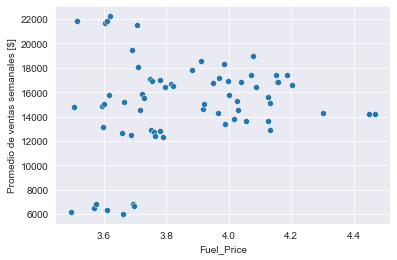

pearson R: 0.17280783803758232


In [16]:
# Prepare de data
mean_sales_by_Fuel_Price = data.groupby('Fuel_Price')['Weekly_Sales'].mean()
mean_sales_by_Fuel_Price = pd.DataFrame(mean_sales_by_Fuel_Price)
mean_sales_by_Fuel_Price.reset_index(inplace=True)

# Plot
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=mean_sales_by_Fuel_Price)
plt.ylabel('Promedio de ventas semanales [$]')
plt.show()

# Pearson R
correlation_matrix_Fuel_Price = np.corrcoef(mean_sales_by_Fuel_Price['Fuel_Price'], mean_sales_by_Fuel_Price['Weekly_Sales'])
correlation_xy_Fuel_Price = correlation_matrix_Fuel_Price[0,1]
print('pearson R:', correlation_xy_Fuel_Price)

This graph does not allow us to assume anything in terms of fuel cost.

## Sales vs Markdowns
First lets check the correlation between sales and the total of all markdowns:

   MarkDown  Weekly_Sales
0    567.35   6334.885938
1   3083.82  13671.254429
2   3640.87   6378.589531
3   3711.67   8328.404194
4   4253.24   7287.401176


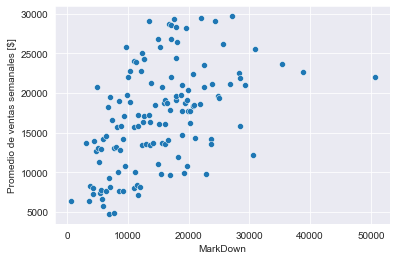

pearson R: 0.4880719511530542


In [33]:
# Get a new column: total markdown
data['MarkDown'] = data['MarkDown1'] + data['MarkDown2'] + data['MarkDown3'] + data['MarkDown4'] + data['MarkDown5']

# Remove markdown outlier (MD > 50,000)
# data = data[data['MarkDown'] < 50000]

# Prepare de data
mean_sales_by_MarkDown = data.groupby('MarkDown')['Weekly_Sales'].mean()
mean_sales_by_MarkDown = pd.DataFrame(mean_sales_by_MarkDown)
mean_sales_by_MarkDown.reset_index(inplace=True)
print(mean_sales_by_MarkDown.head(5))

# Plot
sns.scatterplot(x='MarkDown', y='Weekly_Sales', data=mean_sales_by_MarkDown)
plt.ylabel('Promedio de ventas semanales [$]')
plt.show()

# Pearson R
correlation_matrix_MarkDown = np.corrcoef(mean_sales_by_MarkDown['MarkDown'], mean_sales_by_MarkDown['Weekly_Sales'])
correlation_xy_MarkDown = correlation_matrix_MarkDown[0,1]
print('pearson R:', correlation_xy_MarkDown)

Now lets check the correlation of sales and each type of Markdown:

Correlation coefficients heat map:


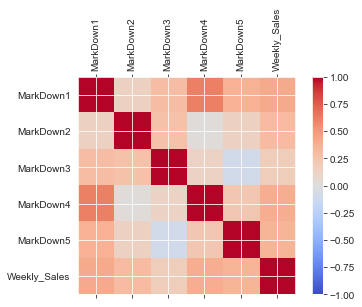

Correlation coefficients values:


,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales
MarkDown1,1.000000,0.135672,0.294057,0.611642,0.370757,0.413261
MarkDown2,0.135672,1.000000,0.273364,0.017120,0.134633,0.307727
MarkDown3,0.294057,0.273364,1.000000,0.127980,-0.089791,0.178035
MarkDown4,0.611642,0.017120,0.127980,1.000000,0.219789,0.393878
MarkDown5,0.370757,0.134633,-0.089791,0.219789,1.000000,0.346293
Weekly_Sales,0.413261,0.307727,0.178035,0.393878,0.346293,1.000000


In [36]:
mean_sales_by_MarkDowns = data.groupby(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])['Weekly_Sales'].mean()
mean_sales_by_MarkDowns = pd.DataFrame(mean_sales_by_MarkDowns)
mean_sales_by_MarkDowns.reset_index(inplace=True)

# Plot the corr map
corr = mean_sales_by_MarkDowns.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(mean_sales_by_MarkDowns.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(mean_sales_by_MarkDowns.columns)
ax.set_yticklabels(mean_sales_by_MarkDowns.columns)
print('Correlation coefficients heat map:')
plt.show()

print('Correlation coefficients values:')
mean_sales_by_MarkDowns.corr()

We can see how Markdowns 1 and 4 are the ones that are most related to sales, while 3 has very little. It would be interesting to know the details of the most correlated Markdowns for a better analysis.

# 3. Recomendations and Conclusions
- Accentuate holiday marketing, due to the increase in sales by 7%. In addition, obtain the data of the most important holidays such as Christmas, July 4 or Thanksgiving.
- Increase online sales in times of extreme temperatures. Also, study the data for months such as January and August, where the extremes are more marked.
- Request details of variables like MarkDown1-5 and CPI, to more clearly analyze the trends found.